In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# read data file usng pandas 
df = pd.read_csv("data/release_data.csv")

# print 5 first row
#df.head(5)

# print size of data file
df.shape

# check for null values in data file
df.isnull().values.any()

False

In [2]:
def plot_corr(df, size=6):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

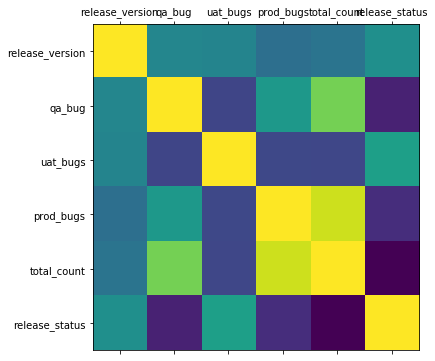

In [3]:
plot_corr(df)


In [4]:
df.corr()
df.tail(5)

,release_version,qa_bug,uat_bugs,prod_bugs,total_count,release_status
44,5.4,9,1,0,11,1
45,5.5,2,1,1,9,2
46,5.6,1,2,0,5,2
47,5.7,4,1,2,16,1
48,5.8,2,1,0,4,3


In [5]:
num_obs = len(df)
num_one = len(df.loc[df['release_status'] == 1])
num_two = len(df.loc[df['release_status'] == 2])
num_three = len(df.loc[df['release_status'] == 3])
print("Number of One Rating cases:  {0} ({1:2.2f}%)".format(num_one, (num_one/num_obs) * 100))
print("Number of Two Rating cases:  {0} ({1:2.2f}%)".format(num_two, (num_two/num_obs) * 100))
print("Number of Three Rating cases: {0} ({1:2.2f}%)".format(num_three, (num_three/num_obs) * 100))

Number of One Rating cases:  19 (38.78%)
Number of Two Rating cases:  26 (53.06%)
Number of Three Rating cases: 4 (8.16%)


In [6]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['release_version', 'qa_bug','uat_bugs','prod_bugs','total_count']
predicted_class_names = ['release_status']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=55) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [7]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.39% in training set
30.61% in test set


In [8]:
print("Original One   : {0} ({1:0.2f}%)".format(len(df.loc[df['release_status'] == 1]), (len(df.loc[df['release_status'] == 1])/len(df.index)) * 100.0))
print("Original Two   : {0} ({1:0.2f}%)".format(len(df.loc[df['release_status'] == 2]), (len(df.loc[df['release_status'] == 2])/len(df.index)) * 100.0))
print("Original Three : {0} ({1:0.2f}%)".format(len(df.loc[df['release_status'] == 3]), (len(df.loc[df['release_status'] == 3])/len(df.index)) * 100.0))
print("")
print("Training One   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training Two   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 2]), (len(y_train[y_train[:] == 2])/len(y_train) * 100.0)))
print("Training Three : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 3]), (len(y_train[y_train[:] == 3])/len(y_train) * 100.0)))
print("")
print("Test One       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test Two       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 2]), (len(y_test[y_test[:] == 2])/len(y_test) * 100.0)))
print("Test Three     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 3]), (len(y_test[y_test[:] == 3])/len(y_test) * 100.0)))


Original One   : 19 (38.78%)
Original Two   : 26 (53.06%)
Original Three : 4 (8.16%)

Training One   : 13 (38.24%)
Training Two   : 18 (52.94%)
Training Three : 3 (8.82%)

Test One       : 6 (40.00%)
Test Two       : 8 (53.33%)
Test Three     : 1 (6.67%)


In [9]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing release_version: {0}".format(len(df.loc[df['release_version'] == 0])))
print("# rows missing qa_bug: {0}".format(len(df.loc[df['qa_bug'] == 0])))
print("# rows missing uat_bugs: {0}".format(len(df.loc[df['uat_bugs'] == 0])))
print("# rows missing prod_bugs: {0}".format(len(df.loc[df['prod_bugs'] == 0])))
print("# rows missing total_count: {0}".format(len(df.loc[df['total_count'] == 0])))

# rows in dataframe 49
# rows missing release_version: 0
# rows missing qa_bug: 0
# rows missing uat_bugs: 0
# rows missing prod_bugs: 20
# rows missing total_count: 0


In [10]:
# NEED CALLOUT MENTION CHANGE TO SIMPLEIMPUTER
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
#Impute with mean all 0 readings
#fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [11]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 1.0000



In [13]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("nb_predict_test", nb_predict_test)
print ("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


nb_predict_test [2 1 2 2 2 1 2 1 2 2 1 1 1 2 2]
y_test [[2]
 [1]
 [2]
 [2]
 [3]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]]
Accuracy: 0.9333


In [14]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[6 0 0]
 [0 8 0]
 [0 1 0]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.89      1.00      0.94         8
           3       0.00      0.00      0.00         1

   micro avg       0.93      0.93      0.93        15
   macro avg       0.63      0.67      0.65        15
weighted avg       0.87      0.93      0.90        15



c:\users\surya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


In [17]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 1.0000
